In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from sklearn.decomposition import PCA

In [41]:
"""

## Assignment 1: Foundation - Computing Eigenvalues by Hand
**Format:** Paper + Jupyter verification

### Paper Work:
Find eigenvalues and eigenvectors for these matrices using the characteristic equation det(A - λI) = 0:

1. **2×2 Matrix:**
   ```
   A₁ = [3  1]
        [0  2]
   ```

2. **2×2 Symmetric Matrix:**
   ```
   A₂ = [4  2]
        [2  1]
   ```

3. **3×3 Upper Triangular:**
   ```
   A₃ = [2  1  3]
        [0  1  2]
        [0  0  4]
   ```

### Jupyter Component:
- Verify your hand calculations using `numpy.linalg.eig()`
- Plot the eigenvectors for the 2×2 matrices
- Compute condition numbers and discuss numerical stability

**Learning Goal:** Master the fundamental computational process and develop number sense for eigenvalue problems.

"""

A1 = np.array([[3,1], [0,2]])
Eig1 = np.linalg.eig(A1)
A2 = np.array([[4,2], [2,1]])
Eig2 = np.linalg.eig(A2)

A3 = np.array([[2,1,3], [0,1,2], [0,0,4]])
Eig3 = np.linalg.eig(A3)
Eig3


EigResult(eigenvalues=array([2., 1., 4.]), eigenvectors=array([[ 1.        , -0.70710678,  0.83631451],
       [ 0.        ,  0.70710678,  0.30411437],
       [ 0.        ,  0.        ,  0.45617155]]))

In [42]:
for el in zip(Eig1.eigenvalues, Eig1.eigenvectors):
    print(el)

(np.float64(3.0), array([ 1.        , -0.70710678]))
(np.float64(2.0), array([0.        , 0.70710678]))


In [43]:
def plot_eigenvectors(matrix_name: str, eigvalues: np.ndarray, eigvectors: np.ndarray) -> None:
    X, Y = 0,1
    plt.figure(figsize=(8, 8))
    colors = plt.cm.tab10(np.linspace(0,1,10))

    
    for idx, (eigvalue, eigvector) in enumerate(zip(eigvalues, eigvectors)):
        plt.arrow(
            x=0, y=0, dx=eigvector[X], dy=eigvector[Y],  
            head_width=0.1, 
            color=colors[idx],
            label=f'λ={eigvalue:.1f}'
        )
        plt.text(
            x=eigvector[X]+0.1, 
            y=eigvector[Y]+0.1,
            s=f'({eigvector[X]:.1f}, {eigvector[Y]:.1f})',
            color=colors[idx],
            fontsize=10,
            fontweight='bold'
        )

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.title(f'Eigenvectors for {matrix_name}')

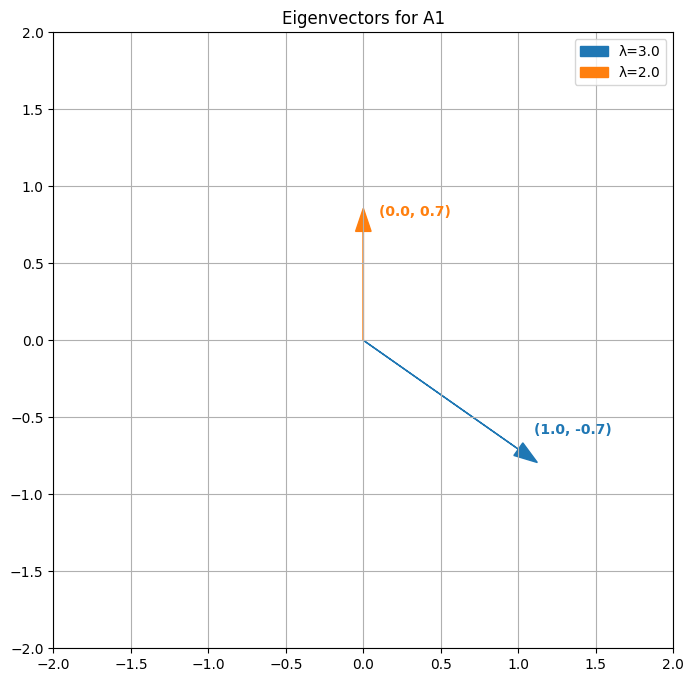

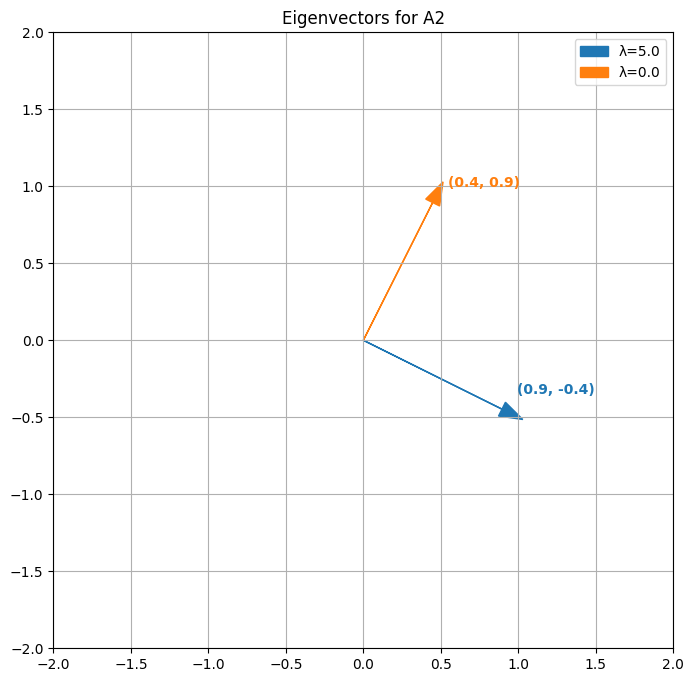

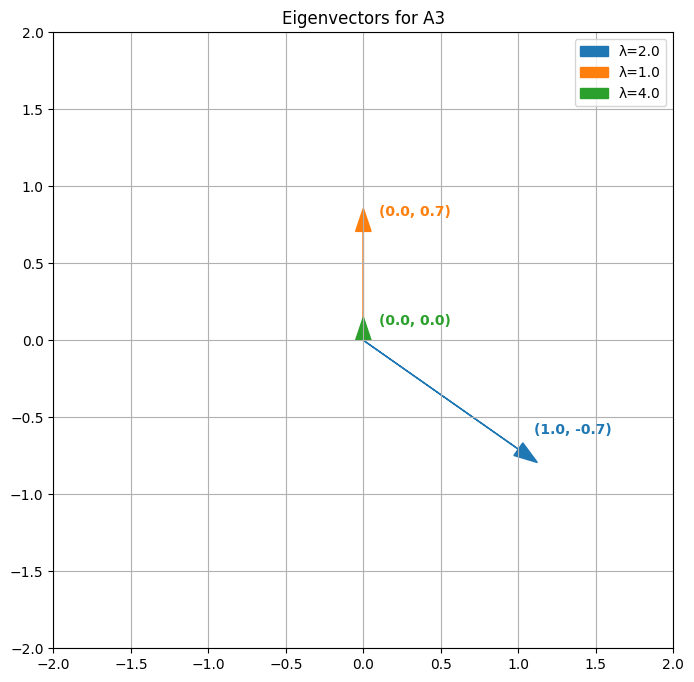

In [44]:
plot_eigenvectors('A1', eigvalues=Eig1.eigenvalues, eigvectors=Eig1.eigenvectors)
plot_eigenvectors('A2', eigvalues=Eig2.eigenvalues, eigvectors=Eig2.eigenvectors)
plot_eigenvectors('A3', eigvalues=Eig3.eigenvalues, eigvectors=Eig3.eigenvectors)

In [45]:
"""
## Assignment 2: Geometric Intuition - Linear Transformations
**Format:** Paper analysis + Jupyter visualization

### Paper Work:
For each transformation matrix, predict what happens to the unit circle and standard basis vectors:

1. **Scaling Matrix:**
   ```
   S = [3  0]
       [0  0.5]
   ```

2. **Rotation + Scaling:**
   ```
   R = [0  -2]
       [2   0]
   ```

3. **Reflection Matrix:**
   ```
   F = [1   0]
       [0  -1]
   ```

### Jupyter Component:
- Create animated visualizations showing how these matrices transform:
  - A grid of points
  - The unit circle
  - Random vectors
- Plot eigenvectors as special directions that don't change direction
- Compare your predictions with the actual transformations

**Learning Goal:** Build geometric intuition for how eigenvalues/eigenvectors relate to linear transformations.

"""

S1 = np.array([[3,0], [0, 0.5]])
S2 = np.array([[0, -2], [2, 0]])
S3 = np.array([[1,0], [0, -1]])

i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

i_hat_trans = S1 @ i_hat 
j_hat_trans = S1 @ j_hat


# for unit circle 
theta = np.linspace(0, 2*np.pi, 100)
unit_circle = np.array([np.cos(theta), np.sin(theta)])

transformed_circle = S1 @ unit_circle



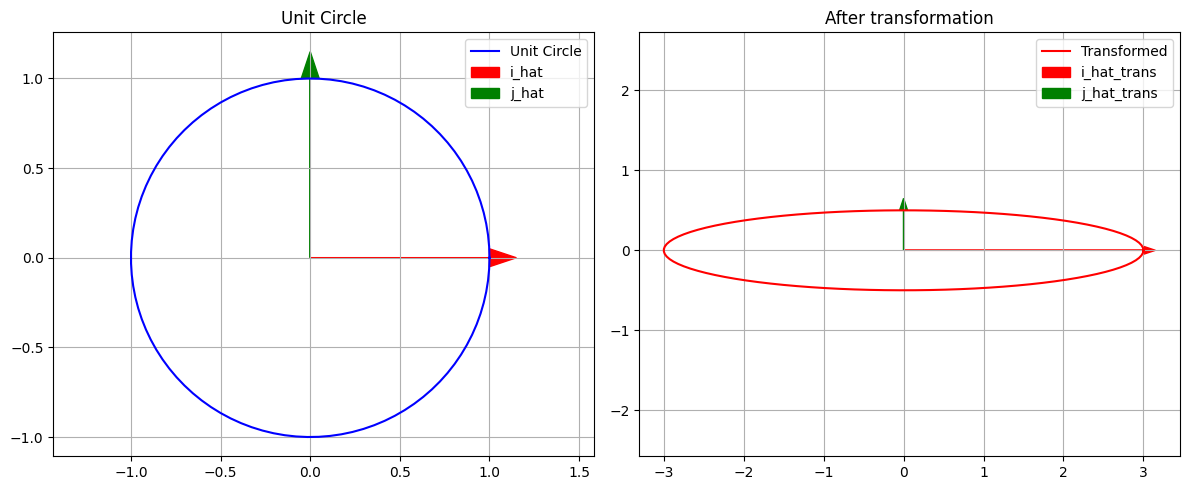

In [46]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(unit_circle[0], unit_circle[1], color='blue', label='Unit Circle')
plt.arrow(0, 0, 1, 0, head_width=0.1, color='red', label='i_hat')
plt.arrow(0, 0, 0, 1, head_width=0.1, color='green', label='j_hat')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.title('Unit Circle')


plt.subplot(1, 2, 2)
plt.plot(transformed_circle[0], transformed_circle[1], color='red', label='Transformed')
plt.arrow(0, 0, i_hat_trans[0], i_hat_trans[1], head_width=0.1, color='red', label='i_hat_trans')
plt.arrow(0, 0, j_hat_trans[0], j_hat_trans[1], head_width=0.1, color='green', label='j_hat_trans')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.title('After transformation')

plt.tight_layout()
plt.show()


In [47]:
A = np.array([[-3, -4], [5,6]])
D = np.array([[1,0], [0,2]])
X = np.array([[-1, 4], [1, -5]])
X_inv = np.array([[-5, -4], [1, -1]])


In [48]:
np.linalg.inv(X)

array([[-5., -4.],
       [-1., -1.]])

In [49]:
"""

## Assignment 3: Diagonalization Deep Dive
**Format:** Paper + Jupyter implementation

### Paper Work:
1. **Diagonalize by hand:**
   ```
   A = [1  2]
       [2  1]
   ```
   Find P and D such that A = PDP⁻¹

2. **Non-diagonalizable case:**
   ```
   B = [1  1]
       [0  1]
   ```
   Explain why this matrix cannot be diagonalized.

3. **Powers of matrices:** Use diagonalization to compute A¹⁰ for matrix A above.

### Jupyter Component:
- Implement your own diagonalization function (don't use built-in)
- Create a function to compute matrix powers using diagonalization
- Compare computational efficiency: A^n vs diagonalization method for large n
- Visualize the effect of repeated applications of the transformation

**Learning Goal:** Understand diagonalization as a change of basis and its computational advantages.

"""
X  = np.array([[1, -1], [1, 1]])

np.linalg.inv(X)

array([[ 0.5,  0.5],
       [-0.5,  0.5]])

In [50]:
"""
2. **Non-diagonalizable case:**
   ```
   B = [1  1]
       [0  1]
   ```
   Explain why this matrix cannot be diagonalized.
"""
B = np.array([[1,1], [0,1]])
np.linalg.eig(B).eigenvectors
# result:
# array([[ 1.00000000e+00, -1.00000000e+00],
#        [ 0.00000000e+00,  2.22044605e-16]])

# which means there is only one eigenvector except trivial one,
# matrix is diagonalizeable iff there is n eigen vectors - 
# so condition is not satisfied

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  2.22044605e-16]])

In [51]:
"""
3. **Powers of matrices:** Use diagonalization to compute A¹⁰ for matrix A above.
"""
A = np.array([[1,2], [2,1]])
eig_vals, eig_vectors = np.linalg.eig(A)
X = eig_vectors
X_inv = np.linalg.inv(X)

D = np.diag([e**10 for e in eig_vals])
A_pow_10 = X @ D @ X_inv
A_pow_10


array([[29525., 29524.],
       [29524., 29525.]])

In [52]:
np.linalg.matrix_power(A, n=10)

array([[29525, 29524],
       [29524, 29525]])

In [53]:
import numpy as np

# Define the matrix A₁
A1 = np.array([[3, 1],
               [0, 2]])

print("Matrix A₁:")
print(A1)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A1)

print("\nEigenvalues:")
for i, val in enumerate(eigenvalues):
    print(f"λ_{i+1} = {val}")

print("\nEigenvectors:")
for i, vec in enumerate(eigenvectors.T):
    print(f"v_{i+1} = {vec}")

# Verify the results
print("\nVerification:")
for i in range(len(eigenvalues)):
    λ = eigenvalues[i]
    v = eigenvectors[:, i]
    Av = A1 @ v
    λv = λ * v
    print(f"\nFor λ_{i+1} = {λ}:")
    print(f"A * v_{i+1} = {Av}")
    print(f"λ_{i+1} * v_{i+1} = {λv}")
    print(f"Equal? {np.allclose(Av, λv)}")

Matrix A₁:
[[3 1]
 [0 2]]

Eigenvalues:
λ_1 = 3.0
λ_2 = 2.0

Eigenvectors:
v_1 = [1. 0.]
v_2 = [-0.70710678  0.70710678]

Verification:

For λ_1 = 3.0:
A * v_1 = [3. 0.]
λ_1 * v_1 = [3. 0.]
Equal? True

For λ_2 = 2.0:
A * v_2 = [-1.41421356  1.41421356]
λ_2 * v_2 = [-1.41421356  1.41421356]
Equal? True


In [54]:
"""

### Jupyter Component:
- Generate 2D correlated data (e.g., height vs weight simulation)
- Implement PCA from scratch:
  ```python
  def my_pca(data, n_components):
      # Your implementation here
      pass
  ```
- Compare with sklearn's PCA
- Visualize:
  - Original data with principal components overlaid
  - Data in the new coordinate system
  - Reconstruction error vs number of components
- Apply to a real dataset (e.g., iris or handwritten digits)

**Learning Goal:** Master the most important application of eigendecomposition in data science.

"""

"\n\n### Jupyter Component:\n- Generate 2D correlated data (e.g., height vs weight simulation)\n- Implement PCA from scratch:\n  ```python\n  def my_pca(data, n_components):\n      # Your implementation here\n      pass\n  ```\n- Compare with sklearn's PCA\n- Visualize:\n  - Original data with principal components overlaid\n  - Data in the new coordinate system\n  - Reconstruction error vs number of components\n- Apply to a real dataset (e.g., iris or handwritten digits)\n\n**Learning Goal:** Master the most important application of eigendecomposition in data science.\n\n"

In [5]:
weight = np.linspace(60, 95, 10)
height = np.linspace(162, 189, 10)
foot_size = np.linspace(26, 43, 10)
weight, height, foot_size

(array([60.        , 63.88888889, 67.77777778, 71.66666667, 75.55555556,
        79.44444444, 83.33333333, 87.22222222, 91.11111111, 95.        ]),
 array([162., 165., 168., 171., 174., 177., 180., 183., 186., 189.]),
 array([26.        , 27.88888889, 29.77777778, 31.66666667, 33.55555556,
        35.44444444, 37.33333333, 39.22222222, 41.11111111, 43.        ]))

In [7]:
X =  np.column_stack([weight, height, foot_size])



In [6]:
np.column_stack([weight, height, foot_size])

array([[ 60.        , 162.        ,  26.        ],
       [ 63.88888889, 165.        ,  27.88888889],
       [ 67.77777778, 168.        ,  29.77777778],
       [ 71.66666667, 171.        ,  31.66666667],
       [ 75.55555556, 174.        ,  33.55555556],
       [ 79.44444444, 177.        ,  35.44444444],
       [ 83.33333333, 180.        ,  37.33333333],
       [ 87.22222222, 183.        ,  39.22222222],
       [ 91.11111111, 186.        ,  41.11111111],
       [ 95.        , 189.        ,  43.        ]])

In [20]:
@dataclass
class PCAResult:
    means: np.ndarray
    pca_matrix: np.ndarray
    transformed: np.ndarray


def my_pca(data: np.ndarray, n_component: int = 2) -> PCAResult:
    """
    data: feature is column vector

    Algorithm:
    1. Center data (store the means)
    2. Scale data (optional)
    3. Calculate covariance matrix
    4. Calculate eigenvalues and eigenvectors
    5. Sort eigenvalue-eigenvector pairs by eigenvalues (descending)
    6. Select top n_components eigenvectors and arrange as columns in basis matrix
    7. Project data: transformed_data = centered_data × basis
    8. Store: basis matrix, eigenvalues, feature means, variance percentages
    """
    means = data.mean(axis=0, keepdims=1)
    # 1. Center data (store the means)
    centered_data = data - means

    # 3. Calculate covariance matrix
    covariance = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)

    # 4. Calculate eigenvalues and eigenvectors
    eig_vals, eig_vect = np.linalg.eig(covariance)

    # 5. Sort eigenvalue-eigenvector pairs by eigenvalues (descending)

    sorted_ids = sorted([(idx, val) for (idx, val)  in enumerate(eig_vals)], key=lambda x: x[1], reverse=True)

    sorted_pairs = [
        (eig_vals[idx], eig_vect[:, idx])  for (idx, _) in sorted_ids[:n_component]
    ]

    pca_matrix = np.array([vector for (_, vector) in sorted_pairs])

    transformed = centered_data @ pca_matrix.T

    return PCAResult(means=means, pca_matrix=pca_matrix.T, transformed=transformed)


array([[ 77.5, 175.5,  34.5]])

In [21]:
result = my_pca(X, n_component=2)
result.transformed.shape

(10, 2)

In [111]:
pca_sk = PCA(n_components=2)
data_pca_sk = pca_sk.fit_transform(X)

data_pca_sk


array([[-2.36801605e+01, -1.35372424e-15],
       [-1.84179026e+01, -5.32049161e-16],
       [-1.31556447e+01, -3.60918610e-15],
       [-7.89338682e+00,  5.01032444e-15],
       [-2.63112894e+00,  3.41934033e-16],
       [ 2.63112894e+00, -3.41934033e-16],
       [ 7.89338682e+00, -8.65399019e-16],
       [ 1.31556447e+01,  3.60918610e-15],
       [ 1.84179026e+01, -1.54041355e-15],
       [ 2.36801605e+01, -2.54508778e-15]])

In [22]:
"""
- Visualize:
  - Original data with principal components overlaid
  - Data in the new coordinate system
  - Reconstruction error vs number of components
- Apply to a real dataset (e.g., iris or handwritten digits)
"""
from sklearn.datasets import load_iris



result.pca_matrix

array([[ 0.73901526,  0.67368868],
       [ 0.57009749, -0.62537898],
       [ 0.35895027, -0.39375714]])

In [ ]:
"""

## Assignment 6: Advanced Topics - Spectral Analysis
**Format:** Paper + Jupyter exploration

### Paper Work:
1. **Spectral theorem:** State and explain why symmetric matrices have special properties
2. **Positive definite matrices:** How do eigenvalues determine positive definiteness?
3. **Condition number:** Relate eigenvalues to numerical stability

### Jupyter Component:
- **Graph Laplacian:** Create a simple graph, compute its Laplacian matrix, and analyze eigenvalues
  - Connect eigenvalues to graph connectivity
  - Use the second smallest eigenvalue (Fiedler value) for graph partitioning
- **Markov chains:** Create a transition matrix, find steady state using eigenvectors
- **Google PageRank simulation:** Implement a simplified PageRank algorithm
- **Stability analysis:** Analyze a linear dynamical system dx/dt = Ax
  - Determine stability from eigenvalue real parts
  - Visualize phase portraits

**Learning Goal:** See eigenvalues as a fundamental tool across mathematics, connecting linear algebra to graph theory, probability, and dynamical systems.
"""